<a href="https://colab.research.google.com/github/putrinahampun/FinalProject-SKom/blob/main/Final/Identifikasi_Anemia_6_noLoss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🩸 **IDENTIFIKASI ANEMIA MELALUI CITRA KONJUNGTIVA MATA MENGGUNAKAN K-MEANS CLUSTERING DAN CONVOLUTIONAL NEURAL NETWORK** 🩸

📑 **Rumusan Masalah:**
Pemeriksaan anemia merupakan tindakan penting untuk mencegah resiko komplikasi dan dampak lainnya dari anemia. Pemeriksaan umumnya dilakukan secara invasif yang membutuhkan waktu dan biaya yang mahal. Teknis pemeriksaan juga menimbulkan rasa sakit sehingga banyak masyarakat yang enggan untuk melakukan pemeriksaan. Alternatif lainnya dapat menggunakan pemeriksaan secara non-invasif, yakni melalui pengamatan terhadap kepucatan warna konjungtiva mata. Namun, pengamatan manusia dapat bersifat subjektif sehingga diperlukan sebuah sistem untuk identifikasi anemia melalui warna citra konjungtiva mata untuk meminimalisir kesalahan persepsi terhadap warna konjungtiva mata penderita anemia.


🎯 **Tujuan Penelitian:**
Untuk mengidentifikasi penyakit anemia melalui citra konjungtiva mata dan memperoleh rekomendasi penanganan yang tepat, menggunakan metode **K-Means Clustering dan Convolutional Neural Network**.


📁 **Dataset**
- Data latih dan validasi diperoleh dari sumber dataset terbuka bernama: *Eyes-defy-anemia* berjumlah 400 gambar.
- Data Uji diperoleh dari pengambilan secara langsung dari Klinik Bidan E.Br.Gultom, A.Md, S.Keb dan dari beberapa tempat pada daerah Kab. Tapanuli Utara.

Link Dataset: https://drive.google.com/drive/folders/1ytbf4USY2WLScqK_9FwT7AO0Kr1O5HRW?usp=drive_link




# **Data Acquisition**
Data berjumlah 400 gambar konjungtiva mata yang telah dikumpulkan, akan disimpan kedalam satu folder pada google drive. Untuk menggunakan data tersebut pada google colab, maka diperlukan proses **Load Data** . Dataset akan dibagi kedalam 2 kelompok data, yaitu data latih (train) dan data validasi (validation) menggunakan proses **Splitting Data**.

## Load Data
Google drive akan dihubungkan dengan workspace yang digunakan pada google colab, dengan menggunakan modul *google.colab*. Dengan menghubungkan keduanya, seluruh folder pada drive dapat diakses.

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset disimpan pada folder dengan nama **TA_2024**. Didalam folder tersebut, terdapat folder **dataset** yang menyimpan 400 data gambar yang telah dikumpulkan.

In [2]:
data = '/content/drive/MyDrive/TA_2024'
dataset = '/content/drive/MyDrive/TA_2024/dataset'

## Splitting Data
Dataset yang dikumpulkan akan dibagi kedalam dua kelompok data, yaitu data latih dan data validasi. Jumlah **data latih** sebanyak **80%** dari keseluruhan data, sementara **data validasi** sebanyak **20%** dari keseluruhan data.

In [ ]:
import os
import random
import shutil

In [ ]:
train_ratio = 0.8
validation_ration = 0.2

Kode berikut menggunakan library os untuk membentuk folder baru dengan nama **train dan validation** di dalam folder **TA_2024** untuk menyimpan data hasil splitting.

In [ ]:
base_dir = data
train = os.path.join(base_dir,'train')
os.makedirs(train, exist_ok=True)

validation = os.path.join(base_dir,'validation')
os.makedirs(validation, exist_ok=True)

Fungsi dibawah ini digunakan untuk melakukan proses splitting. Data yang akan dibagi akan diacak, kemudian dibagi kedalam kelompok train dan validation.

In [ ]:
def split_and_move_images(source_dir, target_train_dir, target_validation_dir, train_ratio):
  files = os.listdir(source_dir)
  random.shuffle(files)
  split_index = int(len(files) * train_ratio)
  train_files = files[:split_index]
  validation_files = files[split_index:]

  for filename in train_files:
    source_path = os.path.join(source_dir, filename)
    target_path = os.path.join(target_train_dir)
    shutil.copy(source_path, target_path)

  for filename in validation_files:
    source_path = os.path.join(source_dir, filename)
    target_path = os.path.join(target_validation_dir)
    shutil.copy(source_path, target_path)

In [ ]:
train = '/content/drive/MyDrive/TA_2024/train'
validation = '/content/drive/MyDrive/TA_2024/validation'

In [ ]:
# JANGAN RUN ULANG
split_and_move_images(dataset, train, validation, train_ratio)

# **Image Pre-processing**
Proses ini merupakan proses penyiapan data latih sebelum digunakan untuk segmentasi dan pemodelan. Data latih akan mengalami proses **cropping** untuk memperoleh citra konjungtiva saja. Data yang telah di cropping kemudian akan mengalami proses **resizing** untuk mengubah ukuran gambar sehingga memudahkan proses pemodelan. Tahap akhir adalah proses **labelling** untuk membagi data kedalam kelas **anemia dan non-anemia**

## Cropping & Resizing
Data train akan melalui proses cropping dan disimpan kedalam folder **cropping**. Data hasil cropping akan digunakan untuk proses resizing dengan mengubah ukuran asli gambar kedalam ukuran tertentu, yaitu: **250 x 120** piksel.

In [ ]:
base_dir = data
cropping = os.path.join(base_dir,'cropping')
os.makedirs(cropping, exist_ok=True)

resizing = os.path.join(base_dir,'resizing')
os.makedirs(resizing, exist_ok=True)

Proses resizing akna dilakukan dengan library *open-cv* pada python.

In [ ]:
!pip install opencv-python

Kode dibawah digunakan untuk melakukan resizing pada salah satu gambar konjungtiva.

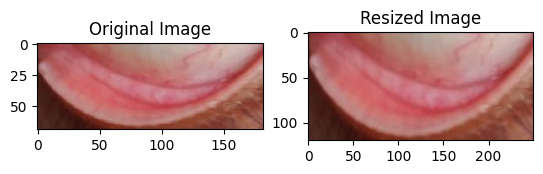

In [ ]:
# CONTOH KODE RESIZING UNTUK SATU GAMBAR

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load gambar (gantilah dengan path gambar Anda)

img = cv2.imread('/content/non-anemia (58).jpg')

# Atur ukuran baru
new_size = (250,120)

# Hitung height dan width dari gambar
height, width = img.shape[:2]

# Hitung skala
scale_x = new_size[0] / width
scale_y = new_size[1] / height

# Hitung new_height dan new_width
new_height = int(height * scale_y)
new_width = int(width * scale_x)

# Resize gambar
img_resized = cv2.resize(img, (new_width, new_height))

# Tampilkan gambar asli dan gambar yang sudah diresize
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')

plt.show()

Kode berikut digunakan untuk proses resizing keseluruhan data pada folder cropping. Hasil resizing akan disimpan kedalam folder dengan nama **resizing**.

In [ ]:
# CONTOH KODE RESIZING UNTUK BANYAK GAMBAR
# JANGAN RUN ULANG
import cv2
import os

# Path ke folder dengan gambar-gambar
input_folder_path = '/content/drive/MyDrive/TA_2024/cropping'
# Path ke folder untuk menyimpan hasil resize
output_folder_path = '/content/drive/MyDrive/TA_2024/resizing'

# Loop melalui setiap file di folder input
for filename in os.listdir(input_folder_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Hanya proses file gambar
        # Load gambar
        img_path = os.path.join(input_folder_path, filename)
        img = cv2.imread(img_path)

        # Atur ukuran baru
        new_size = (250, 120)

        # Hitung height dan width dari gambar
        height, width = img.shape[:2]

        # Hitung skala
        scale_x = new_size[0] / width
        scale_y = new_size[1] / height

        # Hitung new_height dan new_width
        new_height = int(height * scale_y)
        new_width = int(width * scale_x)

        # Resize gambar
        img_resized = cv2.resize(img, (new_width, new_height))

        # Simpan hasil resize ke folder output
        output_path = os.path.join(output_folder_path, f"resized_{filename}")
        cv2.imwrite(output_path, img_resized)

print("Resize selesai dan hasil disimpan di", output_folder_path)

Resize selesai dan hasil disimpan di /content/drive/MyDrive/TA_2024/resizing


Kode dibawah untuk resizing data validasi.

In [ ]:
# RESIZING UNTUK DATA VALIDATION
# JANGAN RUN ULANG
import cv2
import os

# Path ke folder dengan gambar-gambar
input_folder_path = '/content/drive/MyDrive/TA_2024/validation_r'
# Path ke folder untuk menyimpan hasil resize
output_folder_path = '/content/drive/MyDrive/TA_2024/validation'

# Loop melalui setiap file di folder input
for filename in os.listdir(input_folder_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Hanya proses file gambar
        # Load gambar
        img_path = os.path.join(input_folder_path, filename)
        img = cv2.imread(img_path)

        # Atur ukuran baru
        new_size = (250, 120)

        # Hitung height dan width dari gambar
        height, width = img.shape[:2]

        # Hitung skala
        scale_x = new_size[0] / width
        scale_y = new_size[1] / height

        # Hitung new_height dan new_width
        new_height = int(height * scale_y)
        new_width = int(width * scale_x)

        # Resize gambar
        img_resized = cv2.resize(img, (new_width, new_height))

        # Simpan hasil resize ke folder output
        output_path = os.path.join(output_folder_path, f"resized_{filename}")
        cv2.imwrite(output_path, img_resized)

print("Resize selesai dan hasil disimpan di", output_folder_path)


Resize selesai dan hasil disimpan di /content/drive/MyDrive/TA_2024/validation


## Labelling
Tahap ini akan menggunakan library *os* untuk membagi data kedalam dua kelas, yaitu **anemia dan non-anemia**. Folder anemia dan non-anemia akan dibentuk dalam folder **labelling**.

In [ ]:
base_dir = data
labelling = os.path.join(base_dir,'labelling')
os.makedirs(labelling, exist_ok=True)

anemia = os.path.join(labelling,'anemia')
os.makedirs(anemia, exist_ok=True)

non_anemia = os.path.join(labelling,'non_anemia')
os.makedirs(non_anemia, exist_ok=True)

In [ ]:
def labelling(source_dir, target_anemia_dir, target_nonanemia_dir, ratio):
  files = os.listdir(source_dir)
  split_index = int(len(files) * ratio)
  anemia_files = files[:split_index]
  non_anemia_files = files[split_index:]

  for filename in anemia_files:
    source_path = os.path.join(source_dir, filename)
    target_path = os.path.join(target_anemia_dir)
    shutil.copy(source_path, target_path)

  for filename in non_anemia_files:
    source_path = os.path.join(source_dir, filename)
    target_path = os.path.join(target_nonanemia_dir)
    shutil.copy(source_path, target_path)

In [ ]:
# JANGAN RUN ULANG
ratio = 0.5
labelling(resizing, anemia, non_anemia, ratio)

# **Image Segmentation**
Sebelum dilakukan proses segmentasi dengan algoritma **K-Means Clustering**, dilakukan dua teknik pemrosesan citra, yaitu **Equalization dan Unsharp Masking Filter**. Hasil kedua proses akan digunakan untuk mempermudah K-Means dalam melakukan segmnetasi. Hasil segmentasi berupa area piksel yang memiliki warna channel merah (red channel), untuk memperoleh objek konjungtiva mata, yang memiliki warna dasar merah, pada citra.

In [3]:
import os
import cv2
import numpy as np
from google.colab import files

## Equalization
Pada teknik ini, digunakan fungsi **equalizeHist()** untuk meningkatkan distribusi intensitas piksel dalam gambar. Fungsi bekerja terhadap nilai intensitas gambar sehingga format citra perlu diubah. Format asli gambar **RGB (Red, Green, Blue)** akan diubah kedalam format HSV **(Hue, Saturation,Value (*Intensity*))**  


In [ ]:
def equalize_rgb_image(image):
    hsi_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsi_image[:, :, 2] = cv2.equalizeHist(hsi_image[:, :, 2])
    equalized_image = cv2.cvtColor(hsi_image, cv2.COLOR_HSV2BGR)
    return equalized_image

## Unsharp Masking Filter
Unsharp Masking Filter merupakan salah satu teknik pengolahan gambar yang bertujuan untuk meningkatkan ketajaman tepi dan memperjelas struktur detail pada gambar. Teknik ini menggunakan **filter low-pass** pada gaussian blur melalui fungsi **GaussianBlur()**.

In [ ]:
def apply_unsharp_mask(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    unsharp_mask = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)
    return unsharp_mask

## K-Means Clustering & Red Channel
K-Means Clustering digunakan untuk segmentasi warna pada citra, pada penelitian ini segmentasi akan dilakukan pada saluran merah (**red channel**) citra. Jumlah kluster warna yang digunakan adalah 2 (**k=2**). Hasil segmentasi berupa **maska biner** (citra dengan nilai piksel biner 0 & 1 (hitam-putih)) untuk menandai area konjungtiva yang akan diambil.

In [ ]:
def apply_kmeans_clustering_red(image, k=2):

    red_channel = image[:, :, 2]
    red_pixels = red_channel.reshape((-1, 1))
    red_pixels = np.float32(red_pixels)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(red_pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)

    segmented_red_channel = centers[labels.flatten()]
    segmented_red_channel = segmented_red_channel.reshape(red_channel.shape)

    _, binary_mask = cv2.threshold(segmented_red_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, np.ones((5, 5), np.uint8))
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, np.ones((15, 15), np.uint8))

    return binary_mask

Mengaplikasikan operasi bitwise AND antara gambar asli (original_image) dan masker biner (binary_mask) untuk mengekstrak piksel dari gambar asli yang sesuai dengan area yang diidentifikasi oleh masker biner.

In [ ]:
def apply_convolution(original_image, binary_mask):
    conjunctiva_pixels = cv2.bitwise_and(original_image, original_image, mask=binary_mask)
    return conjunctiva_pixels

## Segmentation
Kode dibawah ini digunakan untuk implementasi keseluruhan fungsi yang telah dibuat sebelumnya. Data yang akan disegmentasi, diambil dari folder **labelling** dan akan disimpan ke folder **segmented**.

In [ ]:
def process_images(image_directory, output_directory):
    for category in os.listdir(image_directory):
        category_path = os.path.join(image_directory, category)
        if os.path.isdir(category_path):
            output_category_path = os.path.join(output_directory, category)
            os.makedirs(output_category_path, exist_ok=True)

            for file_name in os.listdir(category_path):
                if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                    image_path = os.path.join(category_path, file_name)

                    # Read the image
                    original_image = cv2.imread(image_path)

                    # Step 1: Equalization of the image in RGB
                    equalized_image = equalize_rgb_image(original_image)

                    # Step 2: Filter Unsharp Masking
                    unsharp_mask_image = apply_unsharp_mask(equalized_image)

                    # Step 3: Red Channel Mask
                    red_channel_mask = apply_kmeans_clustering_red(unsharp_mask_image)

                    # Step 4: Convolution Original Image - Red Channel Mask
                    conjunctiva_pixels = apply_convolution(original_image, red_channel_mask)

                    # Save the segmented image
                    output_file_path = os.path.join(output_category_path, file_name)
                    cv2.imwrite(output_file_path, conjunctiva_pixels)

In [ ]:
data_segmented = os.path.join(data, 'segmented')
os.makedirs(data_segmented, exist_ok=True)

In [ ]:
# Specify the directories
input_directory = '/content/drive/MyDrive/TA_2024/labelling'
output_directory = '/content/drive/MyDrive/TA_2024/segmented'

In [ ]:
# Process the images and save the segmented results
# JANGAN RUN ULANG
process_images(input_directory, output_directory)

# **Image Identification**
Pada tahap ini dilakukan proses modelling dengan menggunakan algoritma **Convolutional Neural Network (CNN)**. Data latih yang telah disegmentasi akan digunakan untuk melatih model CNN, sementara data validasi bertujuan untuk melakukan validasi terhadap prediksi yang dilakukan oleh model. Proses modelling memanfaatkan modul tensorflow.

In [4]:
train_dir = '/content/drive/MyDrive/TA_2024/coba/train_aug'
validation_dir = '/content/drive/MyDrive/TA_2024/validation_crop_aug'

In [5]:
import numpy as np
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

## Callbacks

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
# checkpoint_dir = os.path.join(data,'checkpoints')
# os.makedirs(checkpoint_dir, exist_ok=True)
# checkpoint_filename = "model_checkpoint_epoch_{epoch:02d}.h5"
# checkpoint_filepath = os.path.join(checkpoint_dir, checkpoint_filename)

In [ ]:
# mycallback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    accuracy= 0.94
    if(logs.get('accuracy')>=accuracy and logs.get('val_accuracy')>=accuracy):
      print("\nTarget reached %2.2f%%. Stop Training!!" %(accuracy*100))
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
# checkpoint_callback = ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     monitor='val_loss',
#     save_best_only=True,
#     mode='min',
#     verbose=1
# )

In [ ]:
# early_stopping_callback = EarlyStopping(
#     monitor='val_loss',
#     patience= 3,
#     mode='min',
#     verbose= 1
# )

In [ ]:
# reduce_lr_callback = ReduceLROnPlateau(
#     monitor='val_loss',
#     factor= 0.1,
#     patience= 3,
#     mode='min',
#     verbose= 1
# )

## Modelling

In [6]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(  rescale= 1./255,
                                     horizontal_flip = True,
                                     rotation_range = 45,
                                     brightness_range=[0.8, 1.3])

validation_datagen = ImageDataGenerator( rescale= 1./255 )

train_generator = train_datagen.flow_from_directory(  train_dir,
                                                      target_size=(250, 120),
                                                      batch_size= 10,
                                                      class_mode='binary' )

validation_generator = validation_datagen.flow_from_directory(   validation_dir,
                                                                 target_size=(250, 120),
                                                                 batch_size= 10,
                                                                 class_mode='binary' )

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [8]:
def create_model():

  model = tf.keras.models.Sequential([

      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(250, 120,3)),
      tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile( loss='binary_crossentropy',
                 optimizer=Adam(learning_rate=0.001),
                 metrics=['accuracy'])

  return model

In [9]:
epochs = 35
model = create_model()

history = model.fit( train_generator,
                     steps_per_epoch = 160,
                     epochs= epochs,
                     validation_data = validation_generator,
                     validation_steps = 40 )

Epoch 1/35
160/160 [==============================] - 541s 3s/step - loss: 0.4634 - accuracy: 0.7894 - val_loss: 1.1183 - val_accuracy: 0.6250
Epoch 2/35
160/160 [==============================] - 22s 139ms/step - loss: 0.3323 - accuracy: 0.8806 - val_loss: 0.3462 - val_accuracy: 0.8775
Epoch 3/35
160/160 [==============================] - 21s 134ms/step - loss: 0.3321 - accuracy: 0.8825 - val_loss: 0.6140 - val_accuracy: 0.8275
Epoch 4/35
160/160 [==============================] - 24s 151ms/step - loss: 0.2390 - accuracy: 0.9106 - val_loss: 0.2569 - val_accuracy: 0.8975
Epoch 5/35
160/160 [==============================] - 23s 146ms/step - loss: 0.1740 - accuracy: 0.9419 - val_loss: 0.3131 - val_accuracy: 0.8700
Epoch 6/35
160/160 [==============================] - 23s 143ms/step - loss: 0.1656 - accuracy: 0.9450 - val_loss: 0.2295 - val_accuracy: 0.9125
Epoch 7/35
160/160 [==============================] - 23s 143ms/step - loss: 0.1624 - accuracy: 0.9388 - val_loss: 0.3433 - val_accu

In [10]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', label='Training accuracy')
  plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.plot(epochs, val_loss, 'orange', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

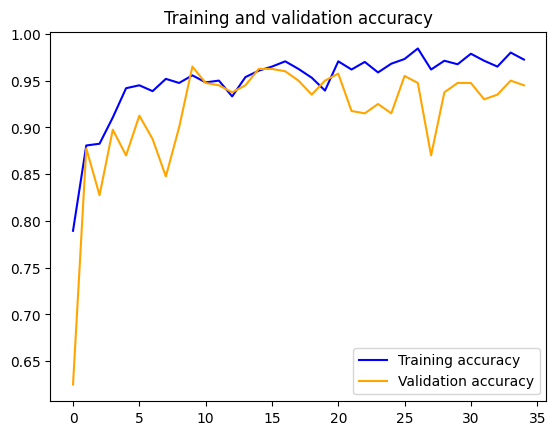

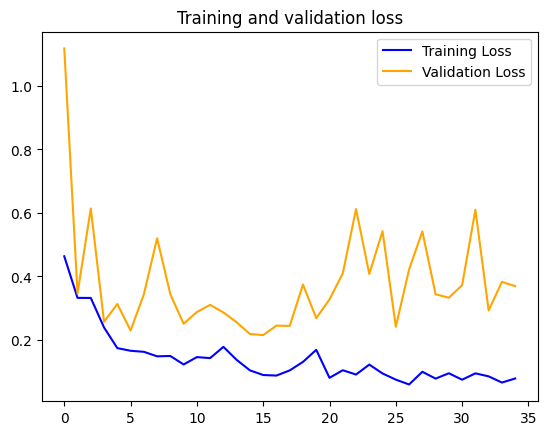

In [11]:
plot_loss_acc(history)

save the model

In [ ]:
from keras.models import save_model

# Simpan model ke dalam file .h5
model.save('/content/drive/MyDrive/TA_2024/best_model_so_far/model_bagus12_90.h5')

# Contoh: '/content/drive/MyDrive/NamaFolder/' adalah path ke folder di Google Drive tempat Anda ingin menyimpan model.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Testing**

In [12]:
from tensorflow.keras.models import load_model

test_dir = '/content/drive/MyDrive/TA_2024/testing'

In [ ]:
# Path ke file model .h5 yang telah disimpan
saved_model_path = '/content/drive/MyDrive/TA_2024/best_model_so_far/model_bagus12_90.h5'

# Memuat model dari file .h5
loaded_model = load_model(saved_model_path)

In [13]:
# Menggunakan ImageDataGenerator untuk mengonversi gambar dari direktori testing
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(250, 120),
    batch_size=10,
    class_mode='binary')

Found 40 images belonging to 2 classes.


In [ ]:
# Evaluasi model yang telah dimuat pada dataset pengujian
test_loss, test_accuracy = loaded_model.evaluate(test_generator)

print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

4/4 [==============================] - 6s 2s/step - loss: 0.2436 - accuracy: 0.9000
Test accuracy: 0.8999999761581421
Test loss: 0.24364563822746277


In [14]:
model.evaluate(test_generator, batch_size=10)

4/4 [==============================] - 25s 8s/step - loss: 0.5554 - accuracy: 0.8500


[0.555390477180481, 0.8500000238418579]

In [ ]:
import numpy as np

# Assuming your testing dataset is in a directory called 'test_dir'
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(250, 120),
    batch_size=10,
    class_mode='binary',
    shuffle=False)

# Get predictions for the test dataset
predictions = loaded_model.predict(test_generator)

# Convert predicted probabilities to class labels (0 or 1)
predicted_labels = np.round(predictions)

# Get true labels from the generator
true_labels = test_generator.classes

# Get the mapping from class indices to class names
class_names = list(test_generator.class_indices.keys())

# Convert numeric labels to class names for true labels
true_class_names = [class_names[label] for label in true_labels]

# Convert numeric labels to class names for predicted labels
predicted_class_names = [class_names[int(label)] for label in predicted_labels]

# Now you can use true_class_names and predicted_class_names for analysis or printing
for i in range(len(true_class_names)):
    print(f"Actual: {true_class_names[i]}, Predicted: {predicted_class_names[i]}")

Found 40 images belonging to 2 classes.
4/4 [==============================] - 5s 1s/step
Actual: anemia, Predicted: anemia
Actual: anemia, Predicted: anemia
Actual: anemia, Predicted: anemia
Actual: anemia, Predicted: anemia
Actual: anemia, Predicted: anemia
Actual: anemia, Predicted: anemia
Actual: anemia, Predicted: anemia
Actual: anemia, Predicted: anemia
Actual: anemia, Predicted: anemia
Actual: anemia, Predicted: anemia
Actual: anemia, Predicted: anemia
Actual: anemia, Predicted: anemia
Actual: anemia, Predicted: anemia
Actual: anemia, Predicted: anemia
Actual: anemia, Predicted: anemia
Actual: anemia, Predicted: anemia
Actual: anemia, Predicted: anemia
Actual: anemia, Predicted: anemia
Actual: anemia, Predicted: anemia
Actual: anemia, Predicted: anemia
Actual: non-anemia, Predicted: non-anemia
Actual: non-anemia, Predicted: non-anemia
Actual: non-anemia, Predicted: anemia
Actual: non-anemia, Predicted: non-anemia
Actual: non-anemia, Predicted: non-anemia
Actual: non-anemia, Pred

<ipython-input-22-72175131574d>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_names = [class_names[int(label)] for label in predicted_labels]


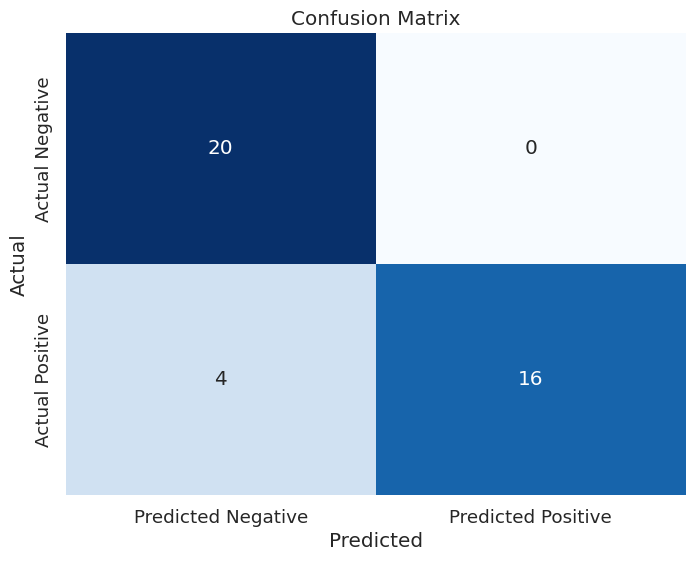

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming true_labels and predicted_labels are your true and predicted labels
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Create a seaborn heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():

  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(250, 120))

  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = loaded_model.predict(images, batch_size=10)

  print(classes)

  if classes[0] < 0.5:
    print(fn + " is a anemia")
  else:
    print(fn + " is a non-anemia")

Saving 528.png to 528.png
1/1 [==============================] - 0s 85ms/step
[[0.8827432]]
528.png is a non-anemia


In [ ]:
# PENGUBAHAN MODEL DARI H5 KE TFLITE
# JANGAN RUN ULANG
from tensorflow.keras.models import load_model

# Gantilah 'nama_model.h5' dengan nama file model H5 Anda
model_path = '/content/drive/MyDrive/TA_2024/best_model_so_far/model_95%_file.h5'
model = load_model(model_path)

import tensorflow as tf

# Inisialisasi konverter
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Konversi model ke format TFLite
tflite_model = converter.convert()

# Gantilah 'nama_model.tflite' dengan nama file yang diinginkan
tflite_file_path = '/content/drive/MyDrive/TA_2024/best_model_so_far/model_95%.tflite'
with open(tflite_file_path, 'wb') as f:
    f.write(tflite_model)